In [341]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
from pysktb import Atom,Structure,System,Hamiltonian,Lattice

In [856]:
def get_ham(p):
    atoms = [Atom(i.species_string, i.frac_coords) for i in p[1:]]
    for i in atoms:
        i.set_orbitals(["px", "py", "pz"])
    atoms[0].set_orbitals(["s", "px", "py", "pz"])
    lattice = Lattice(p.lattice.matrix, 1)
    d = 1
    interactions = {
        "Si": {"e_s": -d*.8, "e_p": [d, d, d]},
        "I": {"e_p": [-d*1.3, -d*1.3, -d*1.3]},
        "SiI": {"V_sps": .3, "V_ppp": -.5, "V_pps": 1.2},
        "II": {"V_ppp": -.08, "V_pps": .2},
        "SiSi": {"V_ppp": 0, "V_pps": 0},
    }
    interactions = {
        "Si": {"e_s": -d*1.3, "e_p": [d, d, d]},
        "I": {"e_p": [-d*1.3, -d*1.3, -d*1.3]},
        "SiI": {"V_sps": .2, "V_ppp": -.4, "V_pps": .8},
        "II": {"V_ppp": -.08, "V_pps": .3},
        "SiSi": {"V_ppp": 0, "V_pps": 0},
    }
    nn = p.get_distance(1, 2)
    bond = {"SiI": {"NN": nn + 1}, "II": {"NN": nn + 1.5}, "SiSi": {"NN": nn + 1}}
    s = Structure(lattice, atoms, bond_cut=bond)
    return Hamiltonian(s, interactions, numba=1)

In [857]:
def plot_bands(ham,ax=None,c="k"):
    path=[[0.,0.,0],[0.5,0,0],[0.5,.5,0],[0,0,0],[.5,.5,.5],[0,.5,0]]
    X=[0.5,0,0]
    G=[0,0,0]
    M=[.5,.5,0]
    R=[.5,.5,.5]
    label=["$\Gamma$","$X$","M","R","$\Gamma$"]
    orbs=ham.orbital_order
    path=[G,X,M,R,G]

    k_path, k_dist,k_pts=ham.get_kpts(path,30)
    evals=ham.solve_kpath(k_path)
    if ax is None:
        fig,ax=plt.subplots()
    for i in evals:#[-8:-1:]:
        ax.plot(k_dist,i,c=c)
    for i in k_pts:ax.axvline(i,c="k",ls="--",lw=.5)
    ax.set_xlabel("k-path")
    ax.set_xticks(k_pts)
    ax.set_xticklabels(label)
    ax.set_xlim(k_dist[0],k_dist[-1])

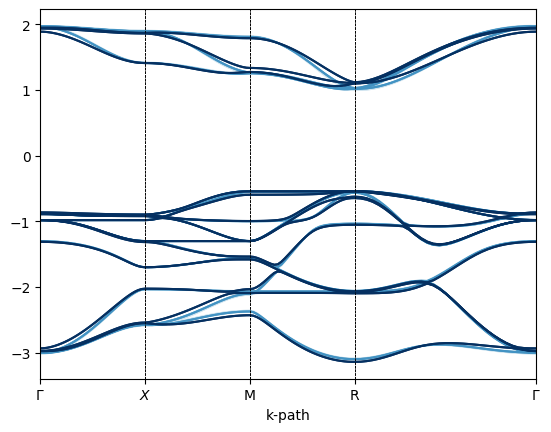

In [858]:
from matplotlib.pyplot import cm

n=3
color = cm.RdBu(np.linspace(0.6, 1, n))
cubic = structure.Structure.from_file("../data/Cssii2.cif")

fig,ax=plt.subplots()
for j,delta in enumerate(np.linspace(0,0.03,n)):
    cubic.translate_sites([1],[delta,delta,delta],frac_coords=True)
    ham=get_ham(cubic)
    plot_bands(ham,ax=ax,c=color[j])

plt.show()

In [425]:
def make_kpoints(cubic,nk=30):
    from pymatgen.symmetry.kpath import KPathLatimerMunro
    kpath=KPathLatimerMunro(cubic)
    k_path=kpath.get_kpoints(coords_are_cartesian=False,line_density=10)[0]
    path_line= kpath.kpath['path'][-3:]
    path=[]
    for lines in path_line:
        path.extend([kpath.kpath['kpoints'][i] for i in lines])
    k_path, k_dist,k_pts=ham.get_kpts(path,nk)
    labels=sum(path_line,[])
    return k_path, k_dist,k_pts,labels

In [788]:
from pymatgen.analysis.structure_analyzer import get_max_bond_lengths

    
def get_hamiltonian(structure,interactions,bond):
    atoms = [Atom(i.species_string, i.frac_coords) for i in structure[1:]]
    for i in atoms:
        i.set_orbitals(["px", "py", "pz"])
    atoms[0].set_orbitals(["s", "px", "py", "pz"])
    lattice = Lattice(structure.lattice.matrix, 1)

    max_bond=get_max_bond_lengths(structure)
    delta=.0
    s = Structure(lattice, atoms, bond_cut=bond)
    return Hamiltonian(s, interactions, numba=1)

In [860]:
def plot_bands(ham,ax=ax,cond_band=37):
    if ax is None:
        fig,ax=plt.subplots()
    G,R,T=([0,0,0],[.5,.5,.5],[.0,0.5,.5])
    path=[G,R,T]
    label=["$\Gamma$","R","T"]
    k_path, k_dist,k_pts=ham.get_kpts(path,nk=30)

    orbs=ham.orbital_order
    evals,vecs=ham.solve_kpath(k_path, eig_vectors=True)
    evals-=np.max(evals[cond_band,:])

    index=[i for i in orbs if "Si" in orbs[i]]
    ham.plot_kproj(evals,vecs,k_dist,index=index,ax=ax,cmap='coolwarm')
    ax.set_xticks(k_pts)
    ax.set_xticklabels(label)
    for i in k_pts:ax.axvline(i,c="k",ls="--",lw=.5)

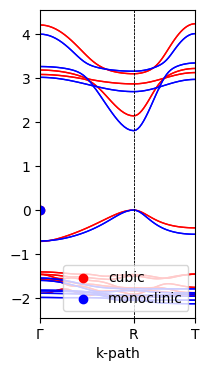

In [929]:

cubic=structure.Structure.from_file("../data/cubic.cif")
mono=structure.Structure.from_file("../data/dipoles1.cif")
for strucs in [cubic,mono]:
    strucs.remove_sites([0,1])
    strucs.replace_species({"Cl":"I","Ge":"Si"})


d = 1.5
interactions = {
        "Si": {"e_s": -d*1.3, "e_p": [d*1, d*1, d*1]},
        "I": {"e_p": [-d*1.3, -d*1.3, -d*1.3]},
        "SiI": {"V_sps": .8, "V_ppp": -.7, "V_pps": 1.9},
        "II": {"V_ppp": -.08, "V_pps": .3},
        "SiSi": {"V_ppp": 0, "V_pps": 0},
    }


bond={"SiI":{"NN":4.619},
          "II":{"NN":4},
          "SiSi":{"NN":2}}

fig,ax=plt.subplots(figsize=(2,4))
G,R,T=([0,0,0],[.5,.5,.5],[.0,0.5,.5])
path=[G,R,T]
label=["$\Gamma$","R","T"]
cond_band=37
for strucs,color,labels in zip([cubic,mono],['r','b'],['cubic','monoclinic']):
    ham=get_hamiltonian(strucs,interactions,bond)
    k_path, k_dist,k_pts=ham.get_kpts(path,nk=30)
    evals=ham.solve_kpath(k_path)
    evals-=np.max(evals[cond_band,:])
    for i in evals[-20:,:]:
        ax.plot(k_dist,i,c=color,lw=1)
    ax.scatter(0,0,label=labels,c=color)
    ax.set_xticks(k_pts)
    ax.set_xticklabels(label)
    for i in k_pts:ax.axvline(i,c="k",ls="--",lw=.5)
    ax.set_xlabel("k-path")
    ax.set_xticks(k_pts)
    ax.set_xticklabels(label)
    ax.set_xlim(k_dist[0],k_dist[-1])
ax.legend(loc="lower right")
plt.show()

In [825]:
ham=get_hamiltonian(mono,interactions,bond)

In [830]:
h=ham.get_ham(R)

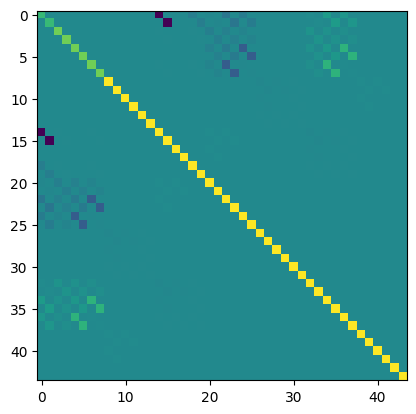

In [832]:
plt.imshow(np.real(h**2))

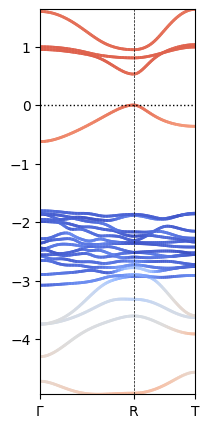

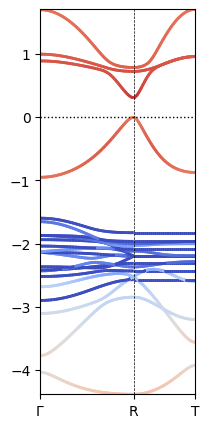

In [861]:
cubic=structure.Structure.from_file("../data/cubic.cif")
mono=structure.Structure.from_file("../data/dipoles1.cif")
for strucs in [cubic,mono]:
    strucs.remove_sites([0,1])
    strucs.replace_species({"Cl":"I","Ge":"Si"})


d = 1
interactions = {
        "Si": {"e_s": -d*.8, "e_p": [d, d, d]},
        "I": {"e_p": [-d*1.3, -d*1.3, -d*1.3]},
        "SiI": {"V_sps": .9, "V_ppp": -.5, "V_pps": 1.2},
        "II": {"V_ppp": -.08, "V_pps": .3},
        "SiSi": {"V_ppp": 0, "V_pps": 0},
    }
for j,strucs in enumerate([cubic,mono]):
    ham=get_hamiltonian(strucs,interactions,bond=bond)
    fig,ax=plt.subplots(1,figsize=(2,5))
    plot_bands(ham,ax=ax,cond_band=37)